# Voting Classifier

## Dataset: Mushrooms Identification
The dataset that we have is related to the identification of mushrooms. This dataset contains 23 variables which helps to identify if a mushroom is poisonous. 

The dependent variable in this dataset is 'class' and it contains two categories. 1. edible = e, 2. poisonous = p.

The independent variables are:-

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises: bruises=t, no=f

odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c, crowded=w, distant=d

gill-size: broad=b, narrow=n

gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape: enlarging=e, tapering=t

stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type: partial=p, universal=u

veil-color: brown=n, orange=o, white=w, yellow=y

ring-number: none=n, one=o, two=t

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Problem Statement:

There are thousands of mushrooms come to the marketplace for sale. Just by looking at those mushrooms, one cannot decide if those mushrooms are edible.

The dataset that we have contain number of parameters/variables that help us to identify if the mushrooms are poisonous. So, we have to build an algorithm to identify if these mushrooms are safe to eat.

## Import the Libraries

In [39]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import the Dataset

In [40]:
ms = pd.read_csv(r"mushrooms.csv")

In [41]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
ms.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


## Data Preprocessing

In [43]:
ms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [44]:
ms.shape

(8124, 23)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ms[ms.select_dtypes(include = ["object"]).columns] = ms[ms.select_dtypes(include = ["object"]).columns].apply(le.fit_transform)

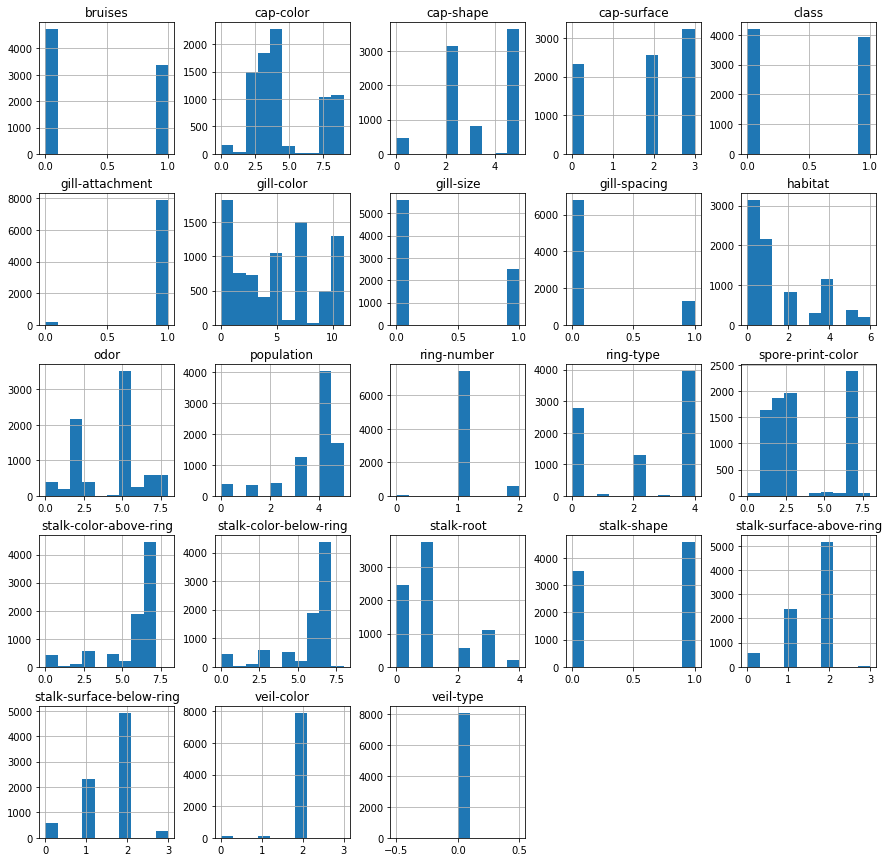

In [46]:
ms.hist(figsize = (15,15))
plt.show()

In [47]:
ms.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [48]:
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [49]:
ms.head()
# here, 1 = p (poisonous) and 0 = e (edible)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [50]:
# make a copy of the original dataset
ms1 = ms.iloc[ : , : ]

## Sampling and Splitting the Dataset

In [51]:
# sampling
from sklearn.model_selection import train_test_split

In [52]:
ms1_x = ms1.iloc[ : , 1 : ]

In [53]:
ms1_y = ms1.iloc[ : , 0 ]

In [54]:
ms1_x_train, ms1_x_test, ms1_y_train, ms1_y_test = train_test_split(ms1_x, ms1_y, test_size = .2, random_state = 555)

## Build the Voting Classifier Model
Voting classifier works on the majority of votes.

We're using logistic regression, decision trees, random forest, SVM, Naive Bayes. 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [56]:
dtree = DecisionTreeClassifier()
logmodel = LogisticRegression()
rfc = RandomForestClassifier()
svc_model = SVC()
naive_bay = MultinomialNB()

In [57]:
from sklearn.ensemble import VotingClassifier
vc1 = VotingClassifier(estimators = [("logmodel", logmodel),("dtree", dtree), ("rfc", rfc),
                                    ("svc_model", svc_model),("naive_bay", naive_bay)], voting = "hard")
# voting = "hard" implies that do the voting based on the categories and not the probabilities

In [58]:
vc1.fit(ms1_x_train, ms1_y_train)

C:\Users\Ashish Kulkarni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('logmodel',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dtree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterio...
                              SVC(C=1.0,

## Prediction and Accuracy

In [59]:
pred_vc1 = vc1.predict(ms1_x_test)

In [60]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_vc1, ms1_y_test)
tab1

array([[850,  12],
       [  0, 763]], dtype=int64)

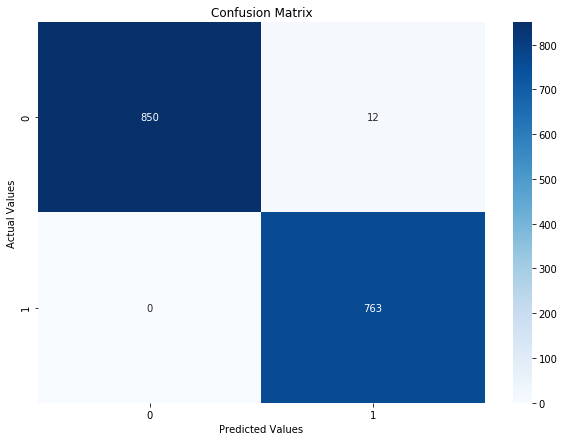

In [61]:
plt.figure(figsize = (10,7))
sns.heatmap(tab1, annot = True, cmap = 'Blues', fmt = 'g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [62]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(pred_vc1, ms1_y_test)
accuracy1

0.9926153846153846

## Conclusion
We have built a Voting Classifer model to identify if the the mushrooms are edible. 

We used five different algorithms such as: logistic regression, decision trees, random forest, SVM, Naive Bayes.    

We managed to obtain an accuracy of 99.26% which is enough to live another day!